## UM atmosphere data loading and plotting with Iris

In [1]:
import os
import os.path

import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt

In [2]:
TOP_LEVEL_DIRECTORY = "/gws/nopw/j04/eerie/public/data"

In [3]:
def load_callback(cube, field, filename):
    """
    An Iris load callback function to delete a few metadata items that will
    prevent the files from being merged into a single cube.
    """
    attributes_to_remove = [
        "creation_date",
        "history",
        "tracking_id"
    ]
    for attr_name in attributes_to_remove:
        del(cube.attributes[attr_name])

In [4]:
tas_files = [
    "EERIE/EERIE/MOHC/HadGEM3-GC5-EERIE-N640-ORCA12/eerie-piControl/r1i1p1f1/Amon/tas/gn/v20230928/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185101-185112.nc",
    "EERIE/EERIE/MOHC/HadGEM3-GC5-EERIE-N640-ORCA12/eerie-piControl/r1i1p1f1/Amon/tas/gn/v20230928/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185201-185212.nc",
    "EERIE/EERIE/MOHC/HadGEM3-GC5-EERIE-N640-ORCA12/eerie-piControl/r1i1p1f1/Amon/tas/gn/v20230928/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185301-185312.nc",
    "EERIE/EERIE/MOHC/HadGEM3-GC5-EERIE-N640-ORCA12/eerie-piControl/r1i1p1f1/Amon/tas/gn/v20230928/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185401-185412.nc",
    "EERIE/EERIE/MOHC/HadGEM3-GC5-EERIE-N640-ORCA12/eerie-piControl/r1i1p1f1/Amon/tas/gn/v20230928/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185501-185512.nc"
]

In [5]:
tas_paths = [os.path.join(TOP_LEVEL_DIRECTORY, file_path) for file_path in tas_files]
cubes = iris.load(tas_paths, callback=load_callback)
tas = cubes.concatenate_cube()

/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(


In [6]:
print(tas)

air_temperature / (K)               (time: 60; latitude: 960; longitude: 1280)
    Dimension coordinates:
        time                             x             -               -
        latitude                         -             x               -
        longitude                        -             -               x
    Scalar coordinates:
        height                      1.5 m
    Cell methods:
        mean                        area, time
    Attributes:
        Conventions                 'CF-1.7 CMIP-6.2 UGRID-1.0'
        activity_id                 'EERIE'
        branch_method               'no parent'
        cmor_version                '3.7.2'
        cv_version                  'EERIE v0.1'
        data_specs_version          '01.00.00'
        experiment                  'pre-industrial control'
        experiment_id               'eerie-piControl'
        external_variables          'areacella'
        forcing_index               1
        frequency              

We have now loaded the muliple netCDF files into a single Iris cube. We can now do something interesting with this loaded data.

### Plotting time slices

Plot the first time point.

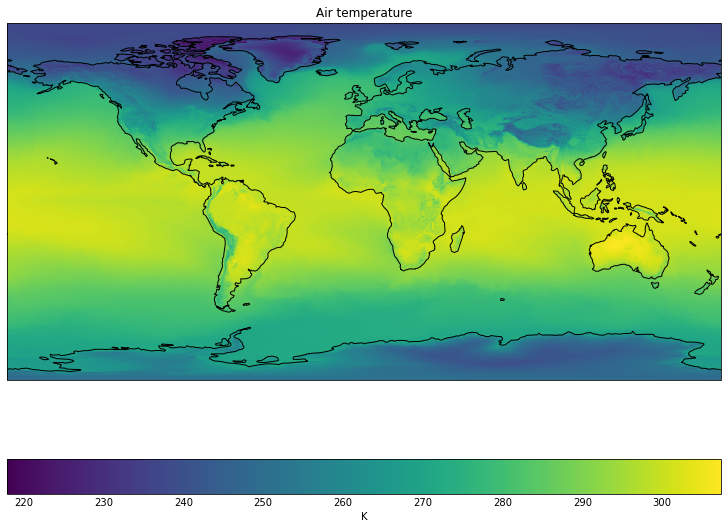

In [7]:
fig = plt.figure(figsize=[12.8, 9.6])
qplt.pcolormesh(tas[0, ...])
plt.draw()
__ = plt.gca().coastlines()  # __ hides the return value in Notebooks

### Time mean

Calculate the area weighted global mean at each time slice and plot this series.

In [8]:
grid_areas = iris.analysis.cartography.area_weights(tas)
global_mean = tas.collapsed(
        ["latitude", "longitude"], iris.analysis.MEAN, weights=grid_areas
    )

/opt/jaspy/lib/python3.10/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [9]:
print(tas.summary(shorten=True))
print(global_mean.summary(shorten=True))

air_temperature / (K)               (time: 60; latitude: 960; longitude: 1280)
air_temperature / (K)               (time: 60)


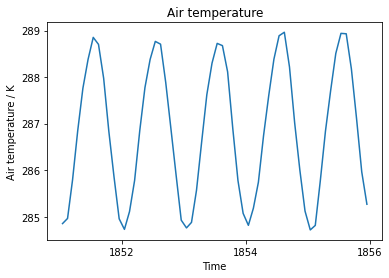

In [10]:
fig = plt.figure()
qplt.plot(global_mean)
plt.draw()